# WEEK 26: Session 54 - Feature Selection Part 1 | Filter Methods | Variance Threshold | Chi-Square

https://www.youtube.com/watch?v=hRTe7tSkR2k&ab_channel=CampusX

### Why we need to reduce the feature of ML model:

1. __Curse of Dimensionality :__ As the number of features or dimensions in a dataset increases, the amount of data needed to make reliable predictions grows exponentially, making it harder to analyze effectively.



2. __Computational Complexity__



3. __Interpretability :__ Diffcult to interpret high dimensional data i.e it will be harder to make inference with too many features.

### Types of feature selection :


1. Filter Methods


2. Wrapper Methods



3. Embedded Methods


4. Hybrid Methods


# Filter Based Feature Selection

- Filter-based feature selection techniques are methods that use statistical measures to score each feature independently, and then select a subset of features based on these scores. 


- These methods are called "filter" methods because they essentially filter out the features that do not meet some criterion.

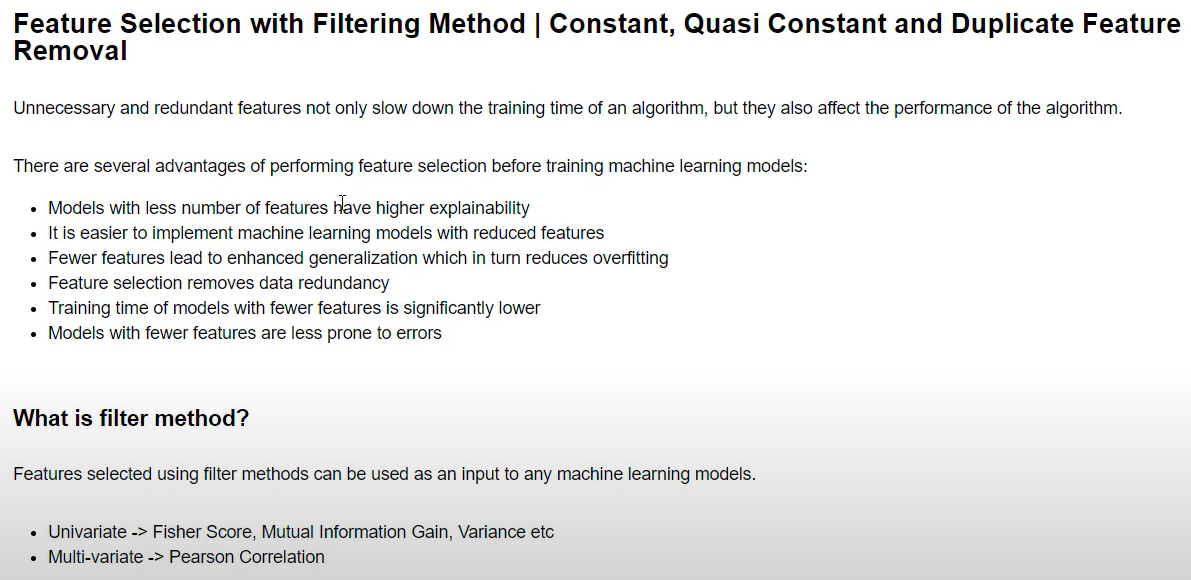

### Types of Filter Methods :

1. __Removing Duplicate columns__


2. __Variance Threshold__


3. __Correation__


4. __ANOVA__ 


5. __Chi-Square__


6. __Mutual Information__

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\fullstackdatascience\ML_Concepts\Feature_Selection\human_act_train.csv").drop(columns='subject')
df.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.923527         -0.934724  ...                        -0.298676   
1         -0.957686         -0.943068  ...                        -0.595051   
2         -0.977469         -0.938692  ...                        -0.390748   
3         -0.989302         -0.938692  ...                        -0.117290   
4         -0.990441         -0.942469  ...                        -0.351471   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.710304                    -0.112754   
1                        -0.861499                     0.053477   
2                        -0.760104                    -0.118559   
3                        -0.482845                    -0.036788   
4                        -0.699205                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  Activity  
0              0.179941             -0.058627  STANDING  
1              0.180289             -0.054317  STANDING  
2              0.180637             -0.049118  STANDING  
3              0.181935             -0.047663  STANDING  
4              0.185151             -0.043892  STANDING  

[5 rows x 562 columns]

In [3]:
df.shape

(7352, 562)

In [4]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

#### total 6 categories

### Applying logistic regression before doing feature selection:


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
df.shape

(7352, 562)

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X.shape, y.shape

((7352, 561), (7352,))

#### encoding label column (y)


In [9]:
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [10]:
np.unique(y,return_counts=True)

(array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
        'WALKING_UPSTAIRS'], dtype=object),
 array([1407, 1286, 1374, 1226,  986, 1073], dtype=int64))

In [11]:
le = LabelEncoder()


y = le.fit_transform(y)

In [12]:
y

array([2, 2, 2, ..., 5, 5, 5])

In [13]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([1407, 1286, 1374, 1226,  986, 1073], dtype=int64))

#### test train split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5881, 561), (1471, 561), (5881,), (1471,))

#### applying standard scaler : 

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss=StandardScaler()

In [18]:
ss.fit(X_train)

StandardScaler()

In [19]:
X_train_ss = ss.fit_transform(X_train)
X_train_ss

array([[ 4.84154973e-02, -1.90693502e-03,  4.26240321e-03, ...,
         1.73243155e+00, -2.03804164e+00, -1.33105290e+00],
       [-5.26817462e-01,  3.99172138e-01, -9.07266413e-02, ...,
         2.76943868e-02,  1.09247078e+00,  1.05901545e+00],
       [ 2.32383149e-01, -7.81281541e-01,  6.15224080e-01, ...,
        -6.46057958e-01,  5.48386857e-01,  1.94028603e-01],
       ...,
       [ 2.75425112e-01, -1.45844203e-02, -1.84493827e-01, ...,
        -7.19316205e-01,  4.20451429e-01,  8.21600247e-02],
       [ 8.35668083e-02, -2.95455585e-02, -7.83258698e-02, ...,
        -6.86468903e-01,  7.65236235e-02, -1.43703850e-01],
       [-1.57022434e-01,  5.80858538e-01,  2.39449144e-01, ...,
        -7.41932552e-01,  4.36201797e-01,  2.16550056e-01]])

In [20]:
X_test_ss = ss.fit_transform(X_test)
X_test_ss

array([[ 0.13050104, -0.87852366, -1.18578546, ..., -0.56665837,
         0.55032509, -0.05783121],
       [-0.24294051, -0.5681061 , -0.49300028, ..., -0.33328761,
         0.40328825,  1.07394222],
       [ 0.24571644,  0.49313677,  0.71773722, ..., -0.7093592 ,
         0.44993573,  0.35570389],
       ...,
       [ 0.15000204, -0.10008158,  0.03894663, ...,  0.33707438,
        -1.0759334 , -0.78673111],
       [ 0.05633149, -0.06660594, -0.00608779, ..., -0.83973848,
         0.12858283,  0.04272538],
       [ 0.14090184, -0.10161683, -0.127372  , ...,  0.34653349,
        -0.87769003, -1.04025147]])

### Applying Logistic Regression

In [21]:
lr = LogisticRegression(max_iter=1000)

In [22]:
lr.fit(X_train_ss,y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = lr.predict(X_test_ss)
y_pred

array([4, 4, 3, ..., 1, 1, 1])

In [24]:
print(f'accuracy of logistic model is {(accuracy_score(y_test,y_pred)*100):.2f}%')

accuracy of logistic model is 98.23%


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.95      0.97      0.96       262
           2       0.97      0.96      0.96       276
           3       1.00      0.99      0.99       247
           4       1.00      0.99      0.99       206
           5       0.99      0.99      0.99       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



## 1. Dropping duplicate features : 

In [26]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

#### function to drop duplicate columns:

In [27]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns= {}
    
    for column in df.columns:
        current_column = df[column]
        
        
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()
        
        
        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column
    
    
    return duplicate_columns

In [28]:
duplicate_columns = get_duplicate_columns(X_train)
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [29]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]


tBodyAccMag-mean()  tBodyAccMag-sma()  tGravityAccMag-mean()  \
57             -0.997420          -0.997420              -0.997420   
4154           -0.133797          -0.133797              -0.133797   
6945            0.130528           0.130528               0.130528   
527            -0.955222          -0.955222              -0.955222   
4196           -0.992499          -0.992499              -0.992499   
...                  ...                ...                    ...   
5191           -0.372758          -0.372758              -0.372758   
5226           -0.256033          -0.256033              -0.256033   
5390           -0.434138          -0.434138              -0.434138   
860            -0.983969          -0.983969              -0.983969   
7270           -0.200163          -0.200163              -0.200163   

      tGravityAccMag-sma()  
57               -0.997420  
4154             -0.133797  
6945              0.130528  
527              -0.955222  
4196             -0.992499  
...                    ...  
5191             -0.372758  
5226             -0.256033  
5390             -0.434138  
860              -0.983969  
7270             -0.200163  

[5881 rows x 4 columns]

In [30]:
duplicate_columns.values()

dict_values([['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-sma()'], ['tGravityAccMag-std()'], ['tGravityAccMag-mad()'], ['tGravityAccMag-max()'], ['tGravityAccMag-min()'], ['tGravityAccMag-energy()'], ['tGravityAccMag-iqr()'], ['tGravityAccMag-entropy()'], ['tGravityAccMag-arCoeff()1'], ['tGravityAccMag-arCoeff()2'], ['tGravityAccMag-arCoeff()3'], ['tGravityAccMag-arCoeff()4'], ['tBodyAccJerkMag-sma()'], ['tBodyGyroMag-sma()'], ['tBodyGyroJerkMag-sma()'], ['fBodyAccMag-sma()'], ['fBodyBodyAccJerkMag-sma()'], ['fBodyBodyGyroMag-sma()'], ['fBodyBodyGyroJerkMag-sma()']])

In [31]:
X_train.shape, X_test.shape

((5881, 561), (1471, 561))

In [32]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)
    

In [33]:
X_train.shape , X_test.shape

((5881, 540), (1471, 540))

#### number of columns reduced from 561 to 540

### Univariate filtering methods : 

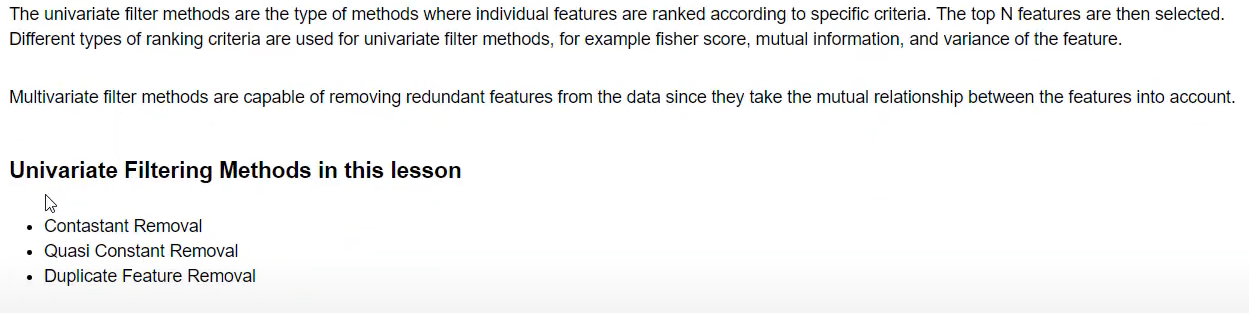

## 2. Variance Threshold

Variance threshold is applied on 2 types of columns:


1. __constant feature__ - variance of a column is 0. i.e column has same values throughout. Drop these columns


2. __Quasi constant features__ - a column B has 995 rows  as 1 and 5 rows = 2. so we can say var(B) $\approx$ 0 $\Longrightarrow$ __Quasi constant feature__

### Variance threshold steps:

1. Define a threshold


2. calculate variance for all features


3. find columns with variance less than threshold and drop those columns

In [34]:
from sklearn.feature_selection import VarianceThreshold

In [35]:
X_train.shape, X_test.shape

((5881, 540), (1471, 540))

### NOTE : scale your columns before applying Variance threshold

#### applying standard scaler : 

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
ss=StandardScaler()

In [38]:
ss.fit(X_train)

StandardScaler()

In [39]:
X_train_ss = ss.fit_transform(X_train)
X_train_ss

array([[ 4.84154973e-02, -1.90693502e-03,  4.26240321e-03, ...,
         1.73243155e+00, -2.03804164e+00, -1.33105290e+00],
       [-5.26817462e-01,  3.99172138e-01, -9.07266413e-02, ...,
         2.76943868e-02,  1.09247078e+00,  1.05901545e+00],
       [ 2.32383149e-01, -7.81281541e-01,  6.15224080e-01, ...,
        -6.46057958e-01,  5.48386857e-01,  1.94028603e-01],
       ...,
       [ 2.75425112e-01, -1.45844203e-02, -1.84493827e-01, ...,
        -7.19316205e-01,  4.20451429e-01,  8.21600247e-02],
       [ 8.35668083e-02, -2.95455585e-02, -7.83258698e-02, ...,
        -6.86468903e-01,  7.65236235e-02, -1.43703850e-01],
       [-1.57022434e-01,  5.80858538e-01,  2.39449144e-01, ...,
        -7.41932552e-01,  4.36201797e-01,  2.16550056e-01]])

In [40]:
X_train_new = pd.DataFrame(X_train_ss,columns=X_train.columns)
X_train_new

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.048415          -0.001907           0.004262   
1             -0.526817           0.399172          -0.090727   
2              0.232383          -0.781282           0.615224   
3              0.009409           0.062957          -0.086039   
4              0.059578          -0.020324           0.039719   
...                 ...                ...                ...   
5876           0.061091          -0.296522           0.226982   
5877           0.207588          -0.742874          -0.273557   
5878           0.275425          -0.014584          -0.184494   
5879           0.083567          -0.029546          -0.078326   
5880          -0.157022           0.580859           0.239449   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.869093         -0.966503         -0.933273         -0.861721   
1             0.619102          1.153890          0.909574          0.674411   
2             1.287607          0.951068          2.386192          1.204999   
3            -0.839392         -0.779769         -0.850853         -0.836917   
4            -0.875674         -0.944633         -0.908392         -0.867361   
...                ...               ...               ...               ...   
5876          0.108952          0.807871          0.398398          0.134078   
5877          0.699934          0.592658          0.322665          0.759299   
5878         -0.051085          0.583766          0.430205         -0.045407   
5879         -0.869983         -0.947463         -0.863850         -0.862267   
5880          0.524826          0.731033          1.084328          0.479452   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.965388         -0.941800         -0.865192  ...   
1             1.164644          0.846088          0.289750  ...   
2             1.020593          2.513187          1.543181  ...   
3            -0.774583         -0.870048         -0.834511  ...   
4            -0.947256         -0.913541         -0.870871  ...   
...                ...               ...               ...  ...   
5876          0.851879          0.426740         -0.020648  ...   
5877          0.651143          0.187395          0.340723  ...   
5878          0.559942          0.456055         -0.144487  ...   
5879         -0.945380         -0.864013         -0.862487  ...   
5880          0.813741          1.105515          0.462840  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                            1.073265                        -1.173854   
1                           -0.292466                         0.534717   
2                           -0.655466                        -1.047582   
3                           -1.078890                        -0.067987   
4                           -0.115234                         0.591063   
...                               ...                              ...   
5876                        -0.409987                         2.234403   
5877                        -0.658855                         0.874780   
5878                        -0.125180                         2.572748   
5879                         1.653105                        -1.808284   
5880                         0.050900                         1.327487   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.896261                     2.199137   
1                            0.099421                     1.835232   
2                           -1.004700                    -0.564655   
3                           -0.074621                     0.586003   
4                            0.569952                    -0.814315   
...                               ...                          ...   
5876                         2.641812                    -0.482653   
5877      

In [41]:
X_test_ss = ss.fit_transform(X_test)
X_test_ss

array([[ 0.13050104, -0.87852366, -1.18578546, ..., -0.56665837,
         0.55032509, -0.05783121],
       [-0.24294051, -0.5681061 , -0.49300028, ..., -0.33328761,
         0.40328825,  1.07394222],
       [ 0.24571644,  0.49313677,  0.71773722, ..., -0.7093592 ,
         0.44993573,  0.35570389],
       ...,
       [ 0.15000204, -0.10008158,  0.03894663, ...,  0.33707438,
        -1.0759334 , -0.78673111],
       [ 0.05633149, -0.06660594, -0.00608779, ..., -0.83973848,
         0.12858283,  0.04272538],
       [ 0.14090184, -0.10161683, -0.127372  , ...,  0.34653349,
        -0.87769003, -1.04025147]])

In [42]:
X_test_new = pd.DataFrame(X_test_ss,columns=X_test.columns)
X_test_new

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.130501          -0.878524          -1.185785   
1             -0.242941          -0.568106          -0.493000   
2              0.245716           0.493137           0.717737   
3              0.029865           0.199345           0.117750   
4             -0.250363           0.537702          -0.094804   
...                 ...                ...                ...   
1466           0.199894          -0.206201           0.261502   
1467           0.041843           0.435073          -0.147436   
1468           0.150002          -0.100082           0.038947   
1469           0.056331          -0.066606          -0.006088   
1470           0.140902          -0.101617          -0.127372   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0             2.222298          1.372769          0.700782          2.401109   
1             1.812403          0.717019          2.256442          1.718616   
2             0.610857          0.469368          0.717441          0.598728   
3            -0.853253         -0.923203         -0.893574         -0.845241   
4             1.530126          1.114471          0.560191          1.440966   
...                ...               ...               ...               ...   
1466         -0.752642         -0.633278         -0.689241         -0.753775   
1467         -0.816514         -0.714021         -0.777574         -0.826291   
1468         -0.857726         -0.935406         -0.916132         -0.849365   
1469         -0.865137         -0.923280         -0.877449         -0.857197   
1470         -0.864392         -0.937302         -0.923995         -0.857150   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0             1.340998          0.655777          1.706921  ...   
1             0.717147          2.154902          1.926909  ...   
2             0.571971          0.645229          0.992509  ...   
3            -0.919129         -0.896118         -0.845618  ...   
4             0.915275          0.530946          1.883486  ...   
...                ...               ...               ...  ...   
1466         -0.654686         -0.712014         -0.690675  ...   
1467         -0.754763         -0.812000         -0.718035  ...   
1468         -0.930829         -0.921969         -0.854767  ...   
1469         -0.926694         -0.875555         -0.858049  ...   
1470         -0.935782         -0.930775         -0.852596  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                            1.307083                        -1.334459   
1                            0.261680                         0.908592   
2                            0.694315                        -0.117188   
3                            0.837497                        -0.989674   
4                           -0.995187                         1.080891   
...                               ...                              ...   
1466                        -0.983616                         1.577315   
1467                        -2.315253                         1.165054   
1468                         0.382816                        -0.316062   
1469                        -0.179542                        -0.569834   
1470                         0.414833                        -0.301719   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -1.020150                    -0.141516   
1                            1.022668                     0.017914   
2                           -0.214964                    -0.170863   
3                           -0.929190                    -0.570452   
4                            1.098207                     1.009737   
...                               ...                          ...   
1466                         1.560233                    -0.107939   
1467      

In [43]:
X_train_new.shape,X_test_new.shape

((5881, 540), (1471, 540))

### NOTE : After Normalising or standardising the data, threshold should be between 0.01 to 0.2

In [44]:
thres = VarianceThreshold(threshold=0.2)
thres

VarianceThreshold(threshold=0.2)

In [45]:
thres.fit(X_train_new)

VarianceThreshold(threshold=0.2)

#### number of columns more than threshold : 

In [46]:
thres.get_support().sum()

540

In [47]:
len(thres.get_feature_names_out())

540

In [48]:
columns_above_threshold = X_train.columns[thres.get_support()] 
columns_above_threshold

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=540)

In [49]:
X_train = thres.transform(X_train_new)
X_test = thres.transform(X_test_new)

In [50]:
X_train = pd.DataFrame(X_train, columns=columns_above_threshold)
X_test = pd.DataFrame(X_test, columns=columns_above_threshold)

In [51]:
X_train.shape, X_test.shape

((5881, 540), (1471, 540))

### Issues with applying VarianceThreshold, Points to Consider : 
1. __Ignores Target Variable :__ Variance Threshold is a univariate method, meaning it
evaluates each feature independently and doesn't consider the relationship between
each feature and the target variable. This means __it may keep irrelevant features that
have a high variance but no relationship with the target, or discard potentially useful
features that have a low variance but a strong relationship with the target.__


2. __Ignores Feature Interactions :__ Variance Threshold doesn't account for interactions
between features. A feature with a low variance may become very informative when
combined with another feature.


3. __Sensitive to Data Scaling :__ Variance Threshold is sensitive to the scale of the data. If
features are not on the same scale, the variance will naturally be higher for features
with larger values. Therefore, ___it is important to standardize the features before
applying Variance Threshold.___


4. __Arbitrary Threshold Value :__ It's up to the user to define what constitutes a "low"
variance. The threshold is not always easy to define and the optimal value can vary
between datasets. ___We don't know what value of threshold is the best___

## 3. Correlation (Pearson correlation Coeff) : 

- ranges from -1 to 1


- check multicollinearity between all columns in pairs

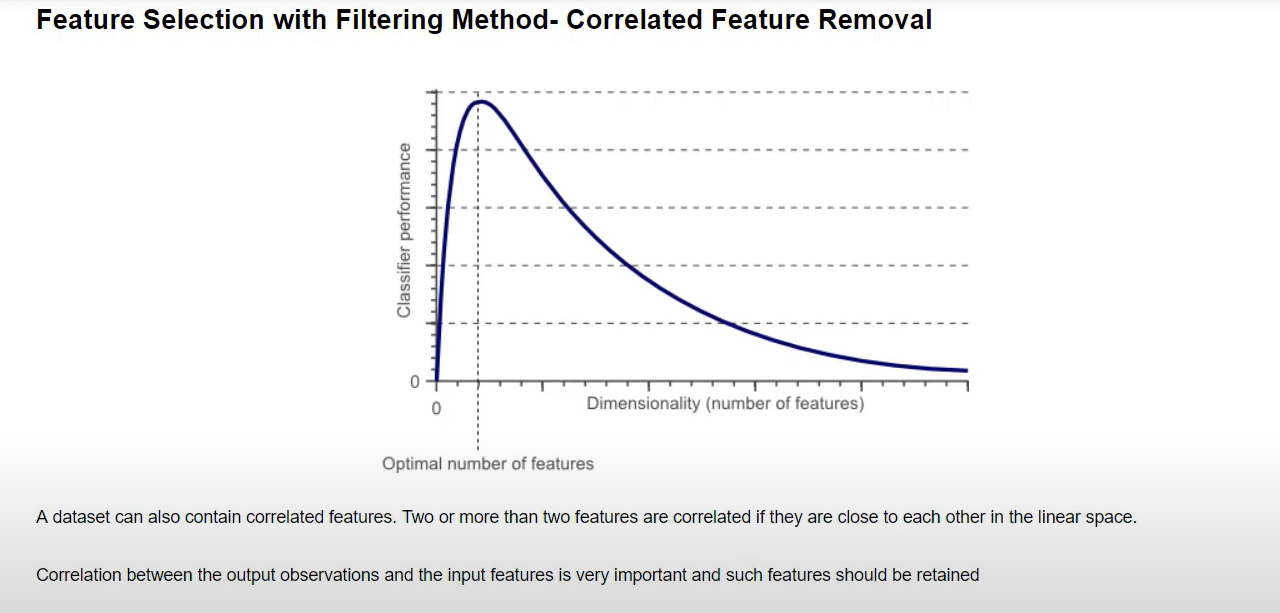

##### will take tooooooooooooooooooooooooooooooooooooooo much time to run

<AxesSubplot:>

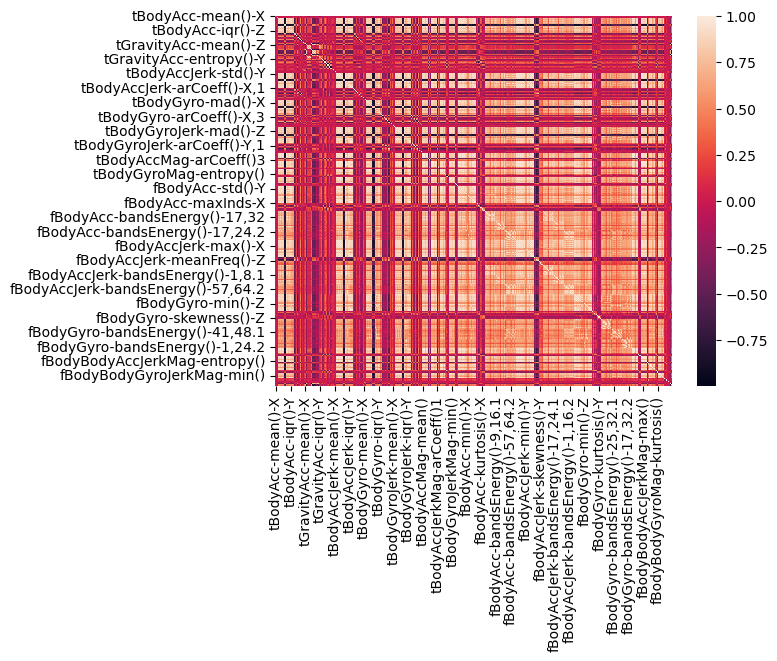

In [52]:
sns.heatmap(X_train.corr())

In [53]:
corr_matrix = X_train.corr()
corr_matrix

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
tBodyAcc-mean()-X                              1.000000           0.139109   
tBodyAcc-mean()-Y                              0.139109           1.000000   
tBodyAcc-mean()-Z                             -0.255110          -0.078663   
tBodyAcc-std()-X                               0.005592          -0.044543   
tBodyAcc-std()-Y                              -0.018651          -0.039185   
...                                                 ...                ...   
angle(tBodyGyroMean,gravityMean)               0.038658           0.017631   
angle(tBodyGyroJerkMean,gravityMean)           0.036274           0.073968   
angle(X,gravityMean)                          -0.038225          -0.002418   
angle(Y,gravityMean)                           0.043507           0.002044   
angle(Z,gravityMean)                           0.023265          -0.018377   

                                      tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
tBodyAcc-mean()-X                             -0.255110          0.005592   
tBodyAcc-mean()-Y                             -0.078663         -0.044543   
tBodyAcc-mean()-Z                              1.000000         -0.013470   
tBodyAcc-std()-X                              -0.013470          1.000000   
tBodyAcc-std()-Y                              -0.014631          0.927247   
...                                                 ...               ...   
angle(tBodyGyroMean,gravityMean)              -0.068808          0.023914   
angle(tBodyGyroJerkMean,gravityMean)          -0.026051         -0.035176   
angle(X,gravityMean)                           0.009247         -0.374114   
angle(Y,gravityMean)                          -0.014765          0.472605   
angle(Z,gravityMean)                          -0.023855          0.393209   

                                      tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
tBodyAcc-mean()-X                            -0.018651         -0.045164   
tBodyAcc-mean()-Y                            -0.039185         -0.051567   
tBodyAcc-mean()-Z                            -0.014631         -0.010054   
tBodyAcc-std()-X                              0.927247          0.850268   
tBodyAcc-std()-Y                              1.000000          0.895065   
...                                                ...               ...   
angle(tBodyGyroMean,gravityMean)             -0.002241         -0.010535   
angle(tBodyGyroJerkMean,gravityMean)         -0.028881         -0.016002   
angle(X,gravityMean)                         -0.383095         -0.344114   
angle(Y,gravityMean)                          0.524945          0.475241   
angle(Z,gravityMean)                          0.432180          0.480824   

                                      tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
tBodyAcc-mean()-X                             0.011353         -0.018060   
tBodyAcc-mean()-Y                            -0.043250         -0.038067   
tBodyAcc-mean()-Z                            -0.011537         -0.013938   
tBodyAcc-std()-X                              0.998631          0.920936   
tBodyAcc-std()-Y                              0.922627          0.997384   
...                                                ...               ...   
angle(tBodyGyroMean,gravityMean)              0.024098         -0.005865   
angle(tBodyGyroJerkMean,gravityMean)         -0.035629         -0.026679   
angle(X,gravityMean)                         -0.370629         -0.379578   
angle(Y,gravityMean)                          0.467965          0.526803   
angle(Z,gravityMean)                          0.389139          0.430548   

                                      tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
tBodyAcc-mean()-X                            -0.047589          0.048114  ...   
tBodyAcc-mean()-Y                            -0.052229         -0.038955  ...   
tBodyAcc-mean()-Z                            -0.004032         -0.031052  ...   
tBodyAcc-std()-X          

In [54]:
# Get the column names of the DataFrame
columns_corr = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns_corr)):
    for j in range(i + 1, len(columns_corr)):
        # correlation between 1 column and all other columns
        if corr_matrix.loc[columns_corr[i], columns_corr[j]] > 0.95:
            columns_to_drop.append(columns_corr[j])

print(len(columns_to_drop))

1660


##### columns may be repeating with other columns. so using set() :

In [55]:
columns_to_drop = set(columns_to_drop)

In [56]:
len(columns_to_drop)

272

##### dropping the columns

In [57]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [58]:
X_train.shape, X_test.shape

((5881, 268), (1471, 268))

### Disadvantages
1. __Linearity Assumption :__ Correlation measures the linear relationship between two
variables. It does not capture non-linear relationships well. If a relationship is
nonlinear, the correlation coefficient can be misleading.


2. __Doesn't Capture Complex Relationships :__ Correlation only measures the relationship
between two variables at a time. It may not capture complex relationships involving
more than two variables.


3. __Threshold Determination :__ Just like variance threshold, defining what level of
correlation is considered "high" can be subjective and may vary depending on the
specific problem or dataset.


4. __Sensitive to Outliers :__ Correlation is sensitive to outliers. A few extreme values can
significantly skew the correlation coefficient.

## 4. One way ANOVA - each input column with ouput column

- It is usually applied when input is numerical columns and output is categorical (more than 2 categories is good)

### One way ANOVA test

- One-way ANOVA (Analysis of Variance) is a statistical method used to __compare the means of
three or more independent groups__ to determine if there are any significant differences
between them. It is an extension of the t-test, which is used for comparing the means of two
independent groups.


- The term "one-way" refers to the fact that there is __only one independent
variable (factor) with multiple levels (groups)__ in this analysis. eg : employee column with  analyst, senior analyst and manager category



- The primary purpose of one-way ANOVA is to test the ___null hypothesis that all the group means
are equal.___ The __alternative hypothesis__ is that at least one group mean is significantly different
from the others.

The elimination process aim to reduce the size of the input feature and at the same time to retain the class discriminatory information for classification problems.
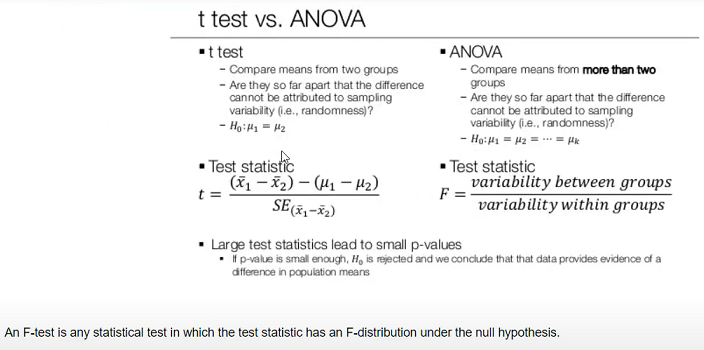

__p-value $\leq$ 0.05 $\rightarrow$ Reject null Hypothesis__

__p-value > 0.05 $\rightarrow$ Fail to Reject null Hypothesis__

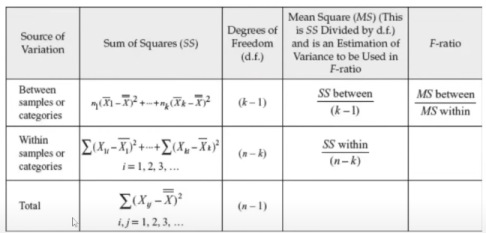

- n is number of rows


- k is number of categories


- (n - k) is degree of freedom for SS within


- (k - 1) is degree of freedom for SS between

#### $\Longrightarrow$ calculating $SS_{Within}$ (Sum of squares within samples or categories) : 


$$\sum (mean\;of\;each\;group - elements\;of\;that\;group)^2$$

> __Internal variance of each group__

#### $\Longrightarrow$ calculating $SS_{Between}$ (Sum of squared between samples or categories) and degree of freedom : 


$$\sum (\text{number of sample in that group}*\;(Grand\;mean\;-\;mean\;of\;each\; group)^2)$$

> __variance between grand mean and each group mean__

### Calculate the F-statistic by dividing the "between-group" mean square by the "within- group" mean square.
$$\text{f-statistics}\Longrightarrow\frac{SS_{between}}{df_{SSB}} * \frac{df_{SSW}}{SS_{within}}$$
<br></br>

In [59]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

##### taking best 100 columns

In [60]:
sel = SelectKBest(f_classif,k=100).fit(X_train, y_train)

In [61]:
# display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z',
       'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tBodyAccJerk-std()-Z', 'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y',
       'tBodyAccJerk-min()-Z', 'tBodyAccJerk-energy()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y',
       'tBodyGyro-std()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Z',
       'tBodyGyro-min()-X', 'tBodyGyro-min()-Y', 'tBodyGyro-min()-Z',
       'tBodyGyro-energy()-X', 'tBodyGyro-energy()-Y', 'tBodyGyro-energy()-Z',
       'tBodyGyro-entropy

In [62]:
columns_kbest = X_train.columns[sel.get_support()]

In [63]:
columns_kbest.shape

(100,)

In [64]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns_kbest)
X_test = pd.DataFrame(X_test, columns=columns_kbest)

In [65]:
X_train.shape, X_test.shape

((5881, 100), (1471, 100))

### Disadvantages of using ANOVA:
1. __Assumption of Normality :__ ANOVA assumes that the data for each group follow
a normal distribution. This assumption may not hold true for all datasets,
especially those with skewed distributions.


2. __Assumption of Homogeneity of Variance :__ ANOVA assumes that the variances
of the different groups are equal. This is the assumption of homogeneity of
variance (also known as homoscedasticity). If this assumption is violated, it
may lead to incorrect results.


3. __Independence of Observations :__ ANOVA assumes that the observations are
independent of each other. This might not be the case in datasets where
observations are related (e.g., time series data, nested data).


4. __Effect of Outliers :__ ANOVA is sensitive to outliers. A single outlier can
significantly affect the F-statistic leading to a potentially erroneous conclusion.


5. __Doesn't Account for Interactions :__ Just like other univariate feature selection
methods, ANOVA does not consider interactions between features.

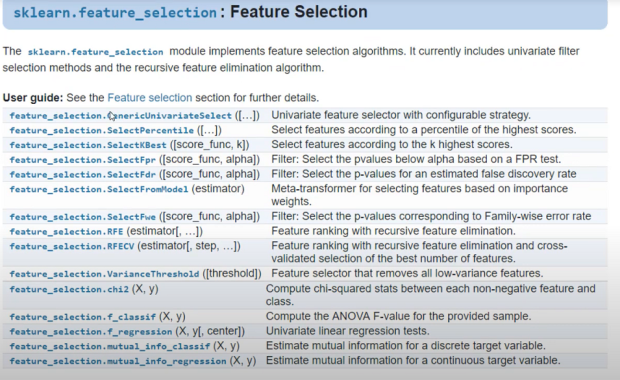

### Moment of Truth : 

In [66]:
X_train.head()

tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-max()-Z  \
0         -0.869093         -0.966503         -0.933273         -0.873225   
1          0.619102          1.153890          0.909574          0.491941   
2          1.287607          0.951068          2.386192          2.571836   
3         -0.839392         -0.779769         -0.850853         -0.851151   
4         -0.875674         -0.944633         -0.908392         -0.863477   

   tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-energy()-Y  \
0          0.892240          0.887210          0.847916            -0.776896   
1         -0.692365         -1.013528         -1.095811             0.970477   
2         -1.113734         -0.917786         -1.173997             0.669458   
3          0.832908          0.745303          0.743343            -0.759411   
4          0.909883          0.875442          0.842770            -0.776190   

   tBodyAcc-energy()-Z  tBodyAcc-entropy()-X  ...  \
0            -0.691281             -1.088440  ...   
1             0.528648              1.074586  ...   
2             3.179211              0.893190  ...   
3            -0.685807             -0.588288  ...   
4            -0.690174             -1.176624  ...   

   fBodyGyro-bandsEnergy()-9,16  fBodyGyro-bandsEnergy()-17,24  \
0                     -0.578313                      -0.564876   
1                     -0.279001                      -0.000358   
2                      0.929548                      -0.248828   
3                     -0.574938                      -0.562139   
4                     -0.578251                      -0.564768   

   fBodyGyro-bandsEnergy()-1,8.1  fBodyGyro-bandsEnergy()-9,16.2  \
0                      -0.550703                       -0.498896   
1                      -0.120806                       -0.138353   
2                       4.476627                        0.134601   
3                      -0.535101                       -0.496479   
4                      -0.550554                       -0.497722   

   fBodyBodyAccJerkMag-min()  fBodyBodyGyroMag-energy()  \
0                  -0.669831                  -0.655268   
1                   0.321986                   0.220541   
2                   1.910464                   1.618224   
3                  -0.712773                  -0.607043   
4                  -0.676630                  -0.653565   

   fBodyBodyGyroJerkMag-min()  angle(X,gravityMean)  angle(Y,gravityMean)  \
0                   -0.646344              1.732432             -2.038042   
1                    2.073539              0.027694              1.092471   
2                   -0.067237             -0.646058              0.548387   
3                   -0.653876             -0.500418              0.725828   
4                   -0.640540             -0.248292              0.887359   

   angle(Z,gravityMean)  
0             -1.331053  
1              1.059015  
2              0.194029  
3              0.318198  
4              0.783007  

[5 rows x 100 columns]

In [67]:
# Initialize and train logistic regression model
lr = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [69]:
print(f'accuracy of logistic model is {(accuracy_score(y_test,y_pred)*100):.2f}%')

accuracy of logistic model is 95.92%


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.89      0.95      0.92       262
           2       0.95      0.88      0.91       276
           3       0.97      0.98      0.98       247
           4       0.99      0.97      0.98       206
           5       0.97      0.98      0.98       200

    accuracy                           0.96      1471
   macro avg       0.96      0.96      0.96      1471
weighted avg       0.96      0.96      0.96      1471



- 563 columns had 98.23% accuracy


- 100 columns has 95.92% accuracy

## 5. Chisquare - categorical input and categorical output

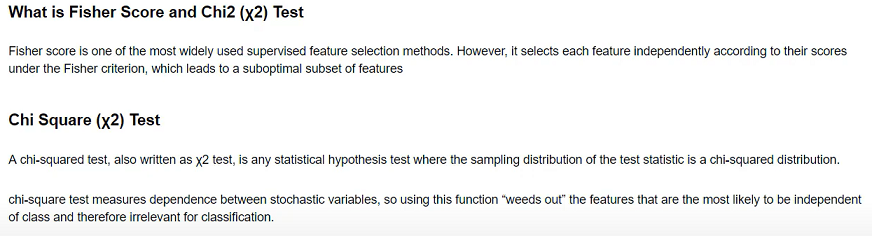

Compute chi-squared stats between each non-negative feature and class.

- This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.
The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [100]:
from sklearn.feature_selection import chi2

In [101]:
titanic =sns.load_dataset('titanic')

In [102]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [103]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [104]:
## ['sex','embarked','alone','pclass','Survived']
titanic.drop(labels =['age','deck'],axis = 1, inplace=True)

In [105]:
titanic = titanic.dropna()

In [106]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [110]:
data = titanic[['pclass','sex','sibsp','parch','embarked','survived']].copy()

In [111]:
data.head()

pclass     sex  sibsp  parch embarked  survived
0       3    male      1      0        S         0
1       1  female      1      0        C         1
2       3  female      0      0        S         1
3       1  female      1      0        S         1
4       3    male      0      0        S         0

In [112]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
survived    0
dtype: int64

In [113]:
data.shape

(889, 6)

In [114]:
ordinal_label = {k: i for i, k in enumerate(data['embarked'].unique(), 0)}
data['embarked'] = data['embarked'].map(ordinal_label)

In [115]:
data

pclass     sex  sibsp  parch  embarked  survived
0         3    male      1      0         0         0
1         1  female      1      0         1         1
2         3  female      0      0         0         1
3         1  female      1      0         0         1
4         3    male      0      0         0         0
..      ...     ...    ...    ...       ...       ...
886       2    male      0      0         0         0
887       1  female      0      0         0         1
888       3  female      1      2         0         0
889       1    male      0      0         1         1
890       3    male      0      0         2         0

[889 rows x 6 columns]

In [116]:
sex = {'male': 0, 'female':1}
data['sex'] = data['sex'].map(sex)

In [117]:
data

pclass  sex  sibsp  parch  embarked  survived
0         3    0      1      0         0         0
1         1    1      1      0         1         1
2         3    1      0      0         0         1
3         1    1      1      0         0         1
4         3    0      0      0         0         0
..      ...  ...    ...    ...       ...       ...
886       2    0      0      0         0         0
887       1    1      0      0         0         1
888       3    1      1      2         0         0
889       1    0      0      0         1         1
890       3    0      0      0         2         0

[889 rows x 6 columns]

### chi-square to test relationship between sex and survived:

#### create contingency table or observed value : 

In [155]:
ct = pd.crosstab(titanic['survived'],titanic['sex'],margins=True)
ct

sex       female  male  All
survived                   
0             81   468  549
1            231   109  340
All          312   577  889

In [156]:
from scipy.stats import chi2_contingency

In [157]:
chi2, p_value, dof, expected = chi2_contingency(ct) # calulate expected values

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))
print("Degrees of Freedom: {}".format(dof))


Chi-Square Statistic: 260.76
P-value: 0.0000
Degrees of Freedom: 4


##### Expected values : 

In [158]:
print("Expected Frequencies: \n{}".format(expected))

Expected Frequencies: 
[[192.67491564 356.32508436 549.        ]
 [119.32508436 220.67491564 340.        ]
 [312.         577.         889.        ]]


In [159]:
expected_values_df = pd.DataFrame(expected)
expected_values_df

0           1      2
0  192.674916  356.325084  549.0
1  119.325084  220.674916  340.0
2  312.000000  577.000000  889.0

In [161]:
expected_values_df.columns = ["female","male","All"]
expected_values_df.index = ["did not survived","survived","All"]
expected_values_df

female        male    All
did not survived  192.674916  356.325084  549.0
survived          119.325084  220.674916  340.0
All               312.000000  577.000000  889.0

In [162]:
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between sex class and survival rate.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between sex class and survival rate.")


We reject the null hypothesis. There is a significant association between sex class and survival rate.


#### doing the same chi-square test with all the column and selecting the best columns:

In [165]:
score = []

for feature in data.columns[:-1]: # all input columns
    
    # create contingency table
    ct = pd.crosstab(titanic['survived'], data[feature]) # cross tab of survived column with all other columns
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<AxesSubplot:>

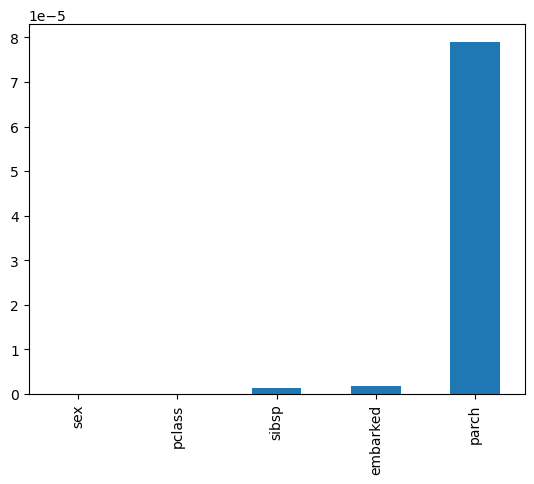

In [167]:
pd.Series(score, index=data.columns[:-1]).sort_values(ascending=True).plot(kind='bar')


### now doing the same using chi2  from sklearn

In [173]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

##### Encode categorical variables

In [179]:
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded[['pclass','sex','sibsp','parch','embarked','survived']].copy()
y = titanic_encoded['survived']

##### Calculate chi-squared stats

In [180]:
chi_scores = chi2(X, y)

In [181]:
# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

In [182]:
p_values

survived    2.077453e-121
sex          1.108034e-21
pclass       3.151471e-13
embarked     1.225432e-03
parch        1.227426e-03
sibsp        2.928480e-01
dtype: float64

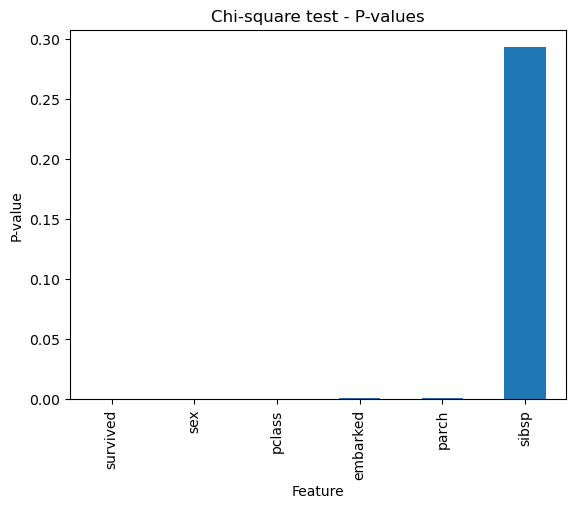

In [183]:
# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()

### Disadvantages of chi-square : 
1. __Categorical Data Only :__ The chi-square test can only be used with categorical variables.
It is not suitable for continuous variables unless they have been discretized into
categories, which can lead to loss of information.


2. __Independence of Observations :__ The chi-square test assumes that the observations are
independent of each other. This might not be the case in datasets where observations
are related (e.g., time series data, nested data).


3. __Sufficient Sample Size :__ Chi-square test requires a sufficiently large sample size. The
results may not be reliable if the sample size is too small or if the frequency count in
any category is too low (typically less than 5).


4. __No Variable Interactions :__ Chi-square test, like other univariate feature selection
methods, does not consider interactions between features. It might miss out on
identifying important features that are significant in combination with other features.

## 5. Feature selection using Mutual Information (Entropy)

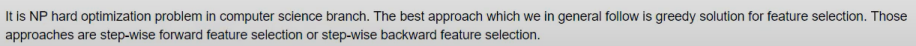

- Mutual Information (MI) is a measure if the __dependency between two variables__.


- It quantifies the amount of information obtained about one random variable through observing the other random variable.


- It is a fundamental qunatity in information theory.


- MI is a measure of the amount of information between two random variables is symmetric and non-negative. and it could be zero  if and only if variables are independent


- The elimination process aims to reduce the size of the input feature set and at the same time to  retain the class discriminatory information for classifcation probems.





$$MI = \sum_{x\;\epsilon\;X} \;\sum_{y \; \epsilon\;Y}\;p (x,y)\;\text{log}\Bigg[\frac{p(x,y)}{p(x)\;p(y)}\Bigg]$$


where:

- p(x,y) is Joint probability of x and y


- p(x) $\rightarrow$ marginal probability of x or marginal density function


- p(y) $\rightarrow$ marginal probability of y or marginal density function

### calculating Joint probability and marginal probability

- we create croos tab with both the columns

1. __Joint Probability :__
   Joint probability refers to the likelihood of two events occurring together. In this case, it's the probability of a passenger both surviving (or not surviving) and being of a specific sex. The joint probability of $X$ and $Y$ is denoted as $P(X \cap Y)$. For example, $P(X=1 \cap Y=\text{'male'})$ represents the probability of a male passenger surviving.



2. __Marginal Probability :__
   Marginal probability refers to the probability of a single event irrespective of the outcome of other variables. The marginal probability of $X$ or $Y$ is the sum of the joint probabilities across the other variable. For example, $P(X=1)$ is the probability of a passenger surviving, and $P(Y=\text{'male'})$ is the probability of a passenger being male.

#### cross tab : 



$$
\begin{array}{|c|c|c|}
\hline
 & \text{'male'} & \text{'female'} \\
\hline
\text{Survived} & \text{Count of Survived Males} & \text{Count of Survived Females} \\
\hline
\text{Not Survived} & \text{Count of Not Survived Males} & \text{Count of Not Survived Females} \\
\hline
\end{array}
$$

The probabilities are calculated by dividing the count in each cell by the total count of all observations.

##### Based on the information provided, we have 5 passengers, 3 males and 2 females. Only 1 male and 1 female survived. :


\begin{array}{|c|c|c|}
\hline
 & \text{'male'} & \text{'female'} \\
\hline
\text{Survived} & 1 & 1 \\
\hline
\text{Not Survived} & 2 & 1 \\
\hline
\end{array}



- Males - 3, Females - 2, Total 5 passengers


- Survived - 2, Male - 1, Female - 1


\begin{array}{|c|c|c|c|}
\hline
 & \text{'male'} & \text{'female'} & \text{All} \\
\hline
\text{Survived} & \frac{1}{5} & \frac{1}{5} & \frac{2}{5} \\
\hline
\text{Not Survived} & \frac{2}{5} & \frac{1}{5} & \frac{3}{5} \\
\hline
\text{All} & \frac{3}{5} & \frac{2}{5} & 1 \\
\hline
\end{array}

Here, the values represent the joint probabilities for the respective categories, with the row and column sums representing the marginal probabilities.




Now, let's calculate the probabilities.



1. Marginal Probability:
   - $P(X=\text{Survived}) = \frac{2}{5} = 0.4$
   - $P(X=\text{Not Survived}) = \frac{3}{5} = 0.6$
   - $P(Y=\text{'male'}) = \frac{3}{5} = 0.6$
   - $P(Y=\text{'female'}) = \frac{2}{5} = 0.4$



2. Joint Probability:
   - $P(X=\text{Survived} \cap Y=\text{'male'}) = \frac{1}{5} = 0.2$
   - $P(X=\text{Survived} \cap Y=\text{'female'}) = \frac{1}{5} = 0.2$
   - $P(X=\text{Not Survived} \cap Y=\text{'male'}) = \frac{2}{5} = 0.4$
   - $P(X=\text{Not Survived} \cap Y=\text{'female'}) = \frac{1}{5} = 0.2$

This cross-tabulation and the corresponding probabilities provide insights into the survival rates with respect to gender.

### Properties of Mutual Information :

The properties of mutual information are as follows:

1. __Non-negativity :__ The mutual information between two variables is always greater than or equal to zero.


2. __Symmetry :__ Mutual information is symmetric, meaning the mutual information between $Y$ and $X$ is the same as the mutual information between $Y$ and $X$. MI(X,Y) = MI(Y,X)


3. __Consistency :__ If two random variables are independent, the mutual information between them is zero.


4. __Additivity :__ For independent sources, the mutual information of the combined variables is the sum of the mutual information of the individual variables.


5. __Capture any type of dependency :__ Unlike correlation, which only captures linear relationship, mutual  information captures any kind of relationship including non-linear ones.



### NOTE : Mutual Information works on numberical data too Unlike chi-square which only works on categorical  data.

Internally MI creates buckets fro numberical data and creates histogram

In [2]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)
df

A   B
0  a1  b1
1  a2  b2
2  a1  b2
3  a1  b1
4  a2  b1
5  a1  b2
6  a2  b2
7  a2  b1

#### normalize='all' gives joint probabilities:


In [3]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob

B      b1    b2  All
A                   
a1   0.25  0.25  0.5
a2   0.25  0.25  0.5
All  0.50  0.50  1.0

In [4]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

In [10]:
# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

In [11]:
X.shape, y.shape

((150, 4), (150,))

### classif is used for classification problems : 

In [12]:
# Compute mutual information
mi = mutual_info_classif(X, y)

In [13]:
# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")

Feature 0: Mutual Information = 0.5006416119407606
Feature 1: Mutual Information = 0.21450083231874206
Feature 2: Mutual Information = 0.9896737238861164
Feature 3: Mutual Information = 0.9883807927039079


#### doing Mutual Information on Iris dataset using sklearn and selectkbest:

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

In [15]:
# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

In [16]:
X.shape, y.shape

((150, 4), (150,))

In [17]:
# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

In [18]:
# Fit and transform
X_new = selector.fit_transform(X, y)

In [19]:
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]


### Disadvantages of Mutual Information:


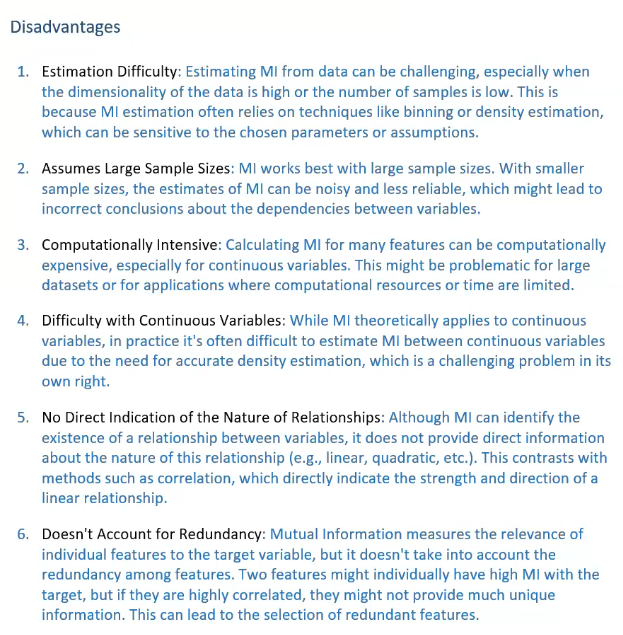

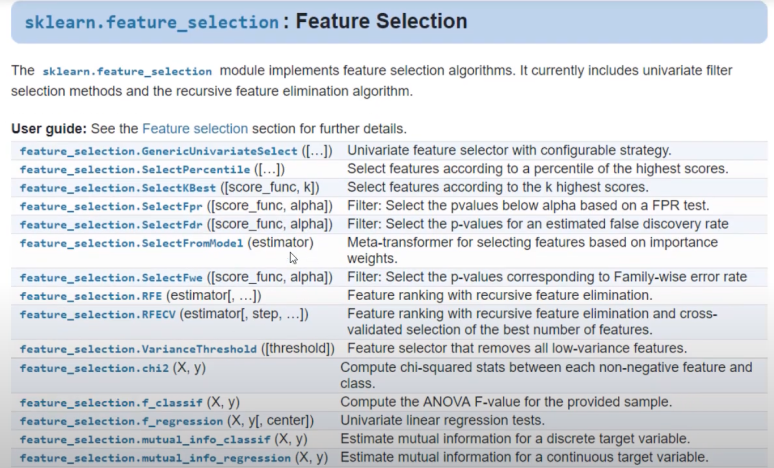

---
---

## Advantages and Disadvantages of Filter Methods: 

### Advantages
1. __Simplicity :__ Filter methods are generally straightforward and easy to understand. They
involve calculating a statistic that measures the relevance of each feature, and selecting
the top features based on this statistic.


2. __Speed :__ These methods are usually computationally efficient. Because they evaluate each
feature independently, they can be much faster than wrapper methods or embedded
methods, which need to train a model to evaluate feature importance.


3. __Scalability :__ Filter methods can handle a large number of features effectively because they
don't involve any learning methods. This makes them suitable for high-dimensional
datasets.


4. __Pre-processing Step :__ They can serve as a pre-processing step for other feature selection
methods. For instance, you could use a filter method to remove irrelevant features before
applying a more computationally expensive method, such as a wrapper method.


### Disadvantages
1. __Lack of Feature Interaction :__ Filter methods treat each feature individually and hence do
not consider the interactions between features. They might miss out on identifying
important features that don't appear significant individually but are significant in
combination with other features.


2. __Model Agnostic :__ Filter methods are agnostic to the machine learning model that will be
used for the prediction. This means that the selected features might not necessarily
contribute to the accuracy of the specific model you want to use.


3. __Statistical Measures Limitation :__ The statistical measures used in these methods have their
own limitations. For example, correlation is a measure of linear relationship and might
not capture non-linear relationships effectively. Similarly, variance-based methods might
keep features with high variance but low predictive power.


4. __Threshold Determination :__ For some methods, determining the threshold to select
features can be a bit subjective. For example, what constitutes "low" variance or "high"
correlation might differ depending on the context or the specific dataset.

## Cheatsheet when to use which filter method:

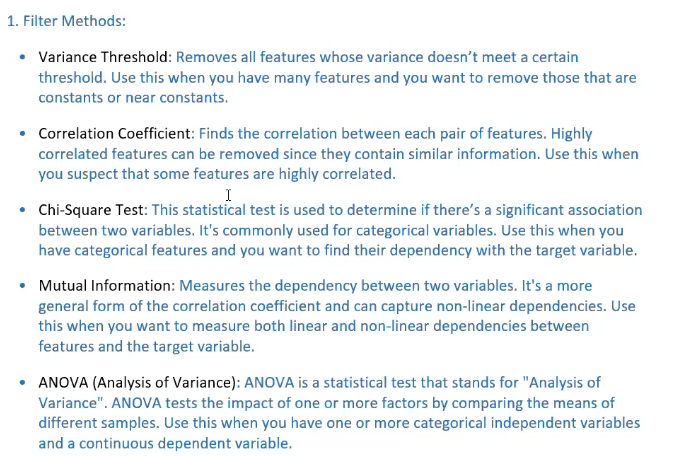